### Simple LeNet Notebook
In this notebook we train a basic LeNet model on our dataset. The goal of this notebook is to analyze the performance of a simple model on our dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load the dataset

In [2]:
image_datagen = ImageDataGenerator(validation_split=0.15, rescale=1.0/255)
train_generator = image_datagen.flow_from_directory('../data/', target_size=(150, 150), batch_size=16, subset="training")
valid_generator = image_datagen.flow_from_directory('../data/', target_size=(150, 150), batch_size=16, subset="validation")

Found 5211 images belonging to 41 classes.
Found 897 images belonging to 41 classes.


### Define LeNet-5 model

In [5]:
model=keras.models.Sequential()

model.add(layers.Conv2D(filters=20, input_shape=(150,150,3), kernel_size=5, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(layers.Conv2D(filters=50, input_shape=(32,32,3), kernel_size=5, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(41, activation='softmax'))
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 20)      1520      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 50)        25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 68450)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               34225500  
_________________________________________________________________
dense_3 (Dense)              (None, 41)               

Train the basic model for 10 epochs using SGD as the optimizer and MSE as the loss.

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

callbacks_list = [EarlyStopping(patience=2),
                  ModelCheckpoint(filepath='checkpoints/LeNet5.{epoch:02d}.h5', monitor=["acc"], verbose=1, mode='max')]

history = model.fit(train_generator, callbacks=callbacks_list, validation_data=valid_generator, epochs=10, steps_per_epoch=5211/32, validation_steps=897/32)

Using TensorFlow backend.


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 162.84375 steps, validate for 28.03125 steps
Epoch 1/10
162/162 [============================>.] - ETA: 1s - loss: 0.0238 - accuracy: 0.0262
Epoch 00001: saving model to checkpoints/LeNet5.01.h5
163/162 [==============================] - 271s 2s/step - loss: 0.0238 - accuracy: 0.0265 - val_loss: 0.0246 - val_accuracy: 0.0366
Epoch 2/10
162/162 [============================>.] - ETA: 1s - loss: 0.0238 - accuracy: 0.0375
Epoch 00002: saving model to checkpoints/LeNet5.02.h5
163/162 [==============================] - 279s 2s/step - loss: 0.0238 - accuracy: 0.0373 - val_loss: 0.0246 - val_accuracy: 0.0388
Epoch 3/10
162/162 [============================>.] - ETA: 1s - loss: 0.0238 - accuracy: 0.0390
Epoch 00003: saving model to checkpoints/LeNet5.03.h5
163/162 [==============================] - 276s 2s/step - loss: 0.0238 - accuracy: 0.0387 - val_loss: 0.0246 - val_accuracy: 0.0539
Epoch 4/10
162/162 [============================>

Plot model train accuracy and validation accuracy.

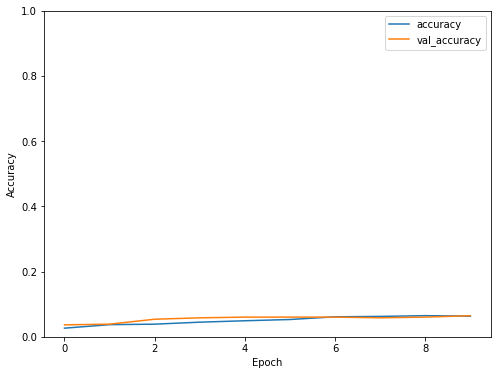

In [9]:
# Example of plotting training and validation accuracy vs epoch
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

The model achieves better accuracy than random, but achieves less accuracy than our baseline.

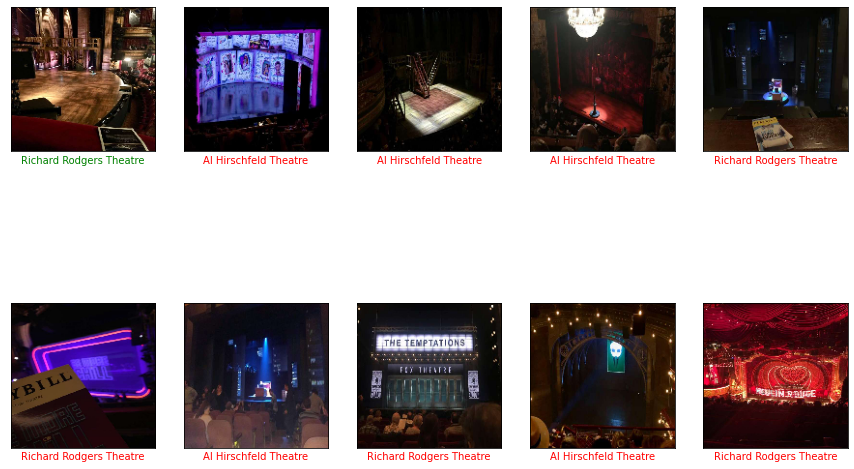

In [10]:
import plotting_util

valid_examples = valid_generator.next()

classifications = []

for im in valid_examples[0]:
    im_reshaped = tf.reshape(im, [-1, 150, 150, 3])
    one_hot = np.zeros((42))
    one_hot[np.argmax(model.predict(im_reshaped))] = 1
    classifications.append(one_hot)

plotting_util.plot_classification_examples(classifications,valid_examples[1],valid_examples[0])